In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis

In [43]:
# Load the dataset
def load_dataset(filepath):
    """
    Load and return the dataset from the given file path.
    """
    data = pd.read_csv(filepath)
    print("Dataset loaded successfully!")
    return data

In [44]:
# Relational Graph: Scatter Plot
def create_relational_graph(data, x_column, y_column, filename="relational_graph.png"):
    """
    Create a scatter plot showing the relationship between two variables.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[x_column], y=data[y_column], alpha=0.7, color='blue')
    plt.title(f"Relational Graph: {y_column} vs {x_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

In [45]:
# Categorical Graph: Bar Plot
def create_categorical_graph(data, category_column, value_column, filename="categorical_graph.png"):
    """
    Create a bar chart comparing multiple categories.
    """
    plt.figure(figsize=(8, 6))
    sns.barplot(x=data[category_column], y=data[value_column], hue=data['Alcohol'], palette="viridis")
    plt.title(f"Categorical Comparison: {value_column} by {category_column}")
    plt.xlabel(category_column)
    plt.ylabel(value_column)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

In [46]:
# Statistical Graph: Heatmap
def create_statistical_graph(data, filename="statistical_graph.png"):
    """
    Create a heatmap showing correlations between numerical features.
    """
    plt.figure(figsize=(10, 8))
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Statistical Heatmap of Feature Correlations")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

    # Display key statistical moments
    moments = pd.DataFrame({
        "Mean": data.mean(),
        "Median": data.median(),
        "Std Dev": data.std(),
        "Skewness": data.apply(skew),
        "Kurtosis": data.apply(kurtosis),
    })
    print("\nStatistical Moments:\n", moments)

In [47]:
# Elbow Plot
def create_elbow_plot(data, max_clusters=10, filename="elbow_plot.png"):
    """
    Create an elbow plot to determine the optimal number of clusters.
    """
    distortions = []
    for i in range(1, max_clusters + 1):
        model = KMeans(n_clusters=i, random_state=42)
        model.fit(data)
        distortions.append(model.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o', color='purple')
    plt.title("Elbow Plot for K-Means Clustering")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

In [48]:
# Clustering Function
def perform_clustering(data, n_clusters, filename="clustering_graph.png"):
    """
    Perform K-Means clustering and visualize the clusters.
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Plot clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=scaled_data[:, 0],
        y=scaled_data[:, 1],
        hue=clusters,
        palette="viridis",
        alpha=0.7,
        legend="full"
    )
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', label='Centroids', marker='X')
    plt.title(f"K-Means Clustering (k={n_clusters})")
    plt.xlabel("Feature 1 (Scaled)")
    plt.ylabel("Feature 2 (Scaled)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

    silhouette = silhouette_score(scaled_data, clusters)
    print(f"Silhouette Score for k={n_clusters}: {silhouette:.2f}")
    return clusters

In [49]:
# Fitting Function
def perform_fitting(data, x_column, y_column, filename="fitting_graph.png"):
    """
    Perform linear regression and plot the fit with confidence intervals.
    """
    X = data[[x_column]]
    y = data[y_column]
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)

    # Plot with regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(x=data[x_column], y=data[y_column], ci=95, color='red', scatter_kws={'alpha': 0.6})
    plt.title(f"Linear Fit: {y_column} vs {x_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

Dataset loaded successfully!


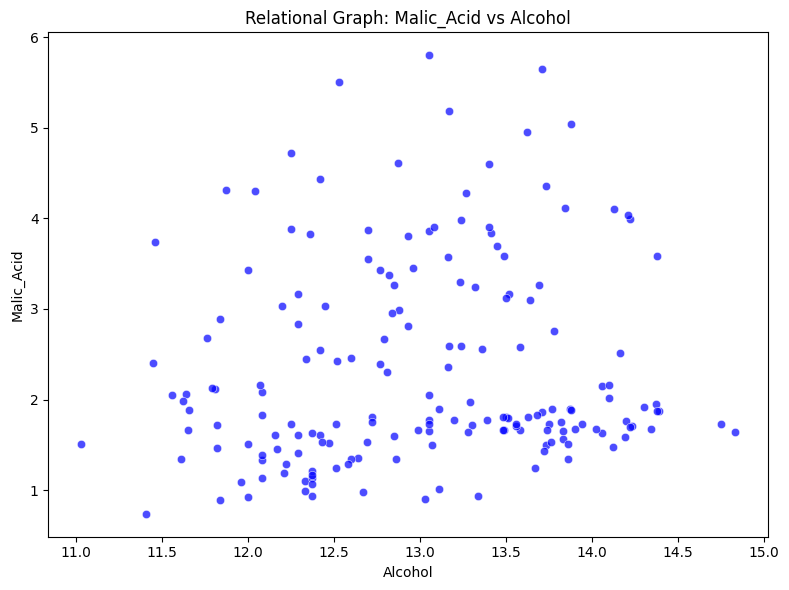

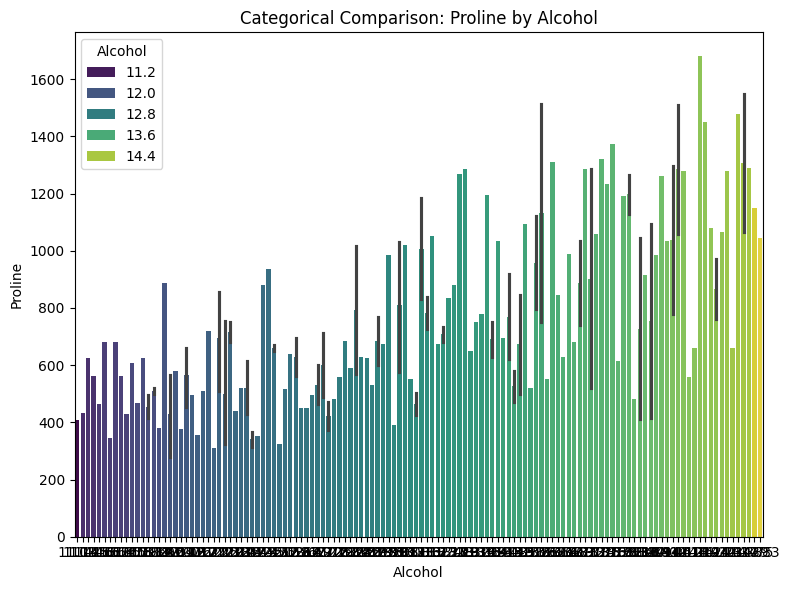

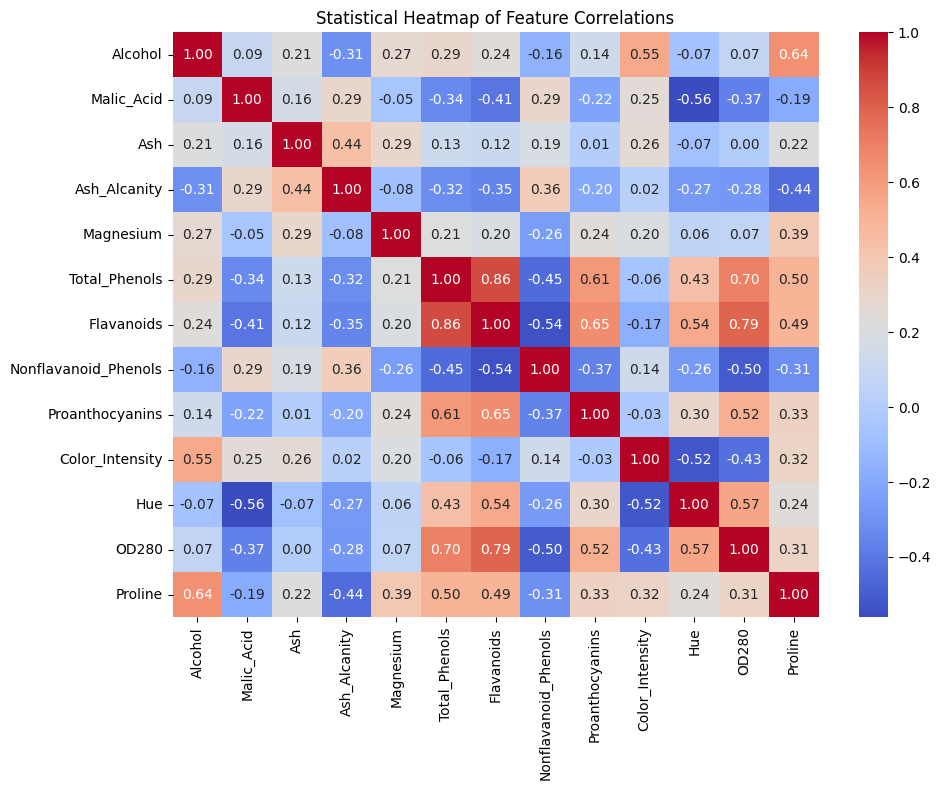


Statistical Moments:
                             Mean   Median     Std Dev  Skewness  Kurtosis
Alcohol                13.000618   13.050    0.811827 -0.051047 -0.862260
Malic_Acid              2.336348    1.865    1.117146  1.030869  0.257348
Ash                     2.366517    2.360    0.274344 -0.175207  1.078576
Ash_Alcanity           19.494944   19.500    3.339564  0.211247  0.440823
Magnesium              99.741573   98.000   14.282484  1.088915  2.012806
Total_Phenols           2.295112    2.355    0.625851  0.085907 -0.845857
Flavanoids              2.029270    2.135    0.998859  0.025129 -0.889365
Nonflavanoid_Phenols    0.361854    0.340    0.124453  0.446349 -0.652952
Proanthocyanins         1.590899    1.555    0.572359  0.512769  0.505671
Color_Intensity         5.058090    4.690    2.318286  0.861248  0.337370
Hue                     0.957449    0.965    0.228572  0.020913 -0.368025
OD280                   2.611685    2.780    0.709990 -0.304690 -1.089675
Proline        

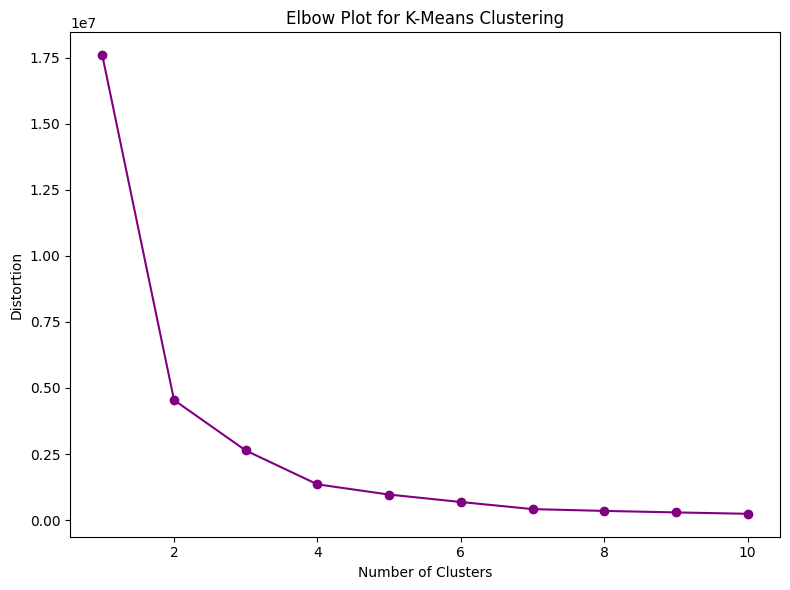

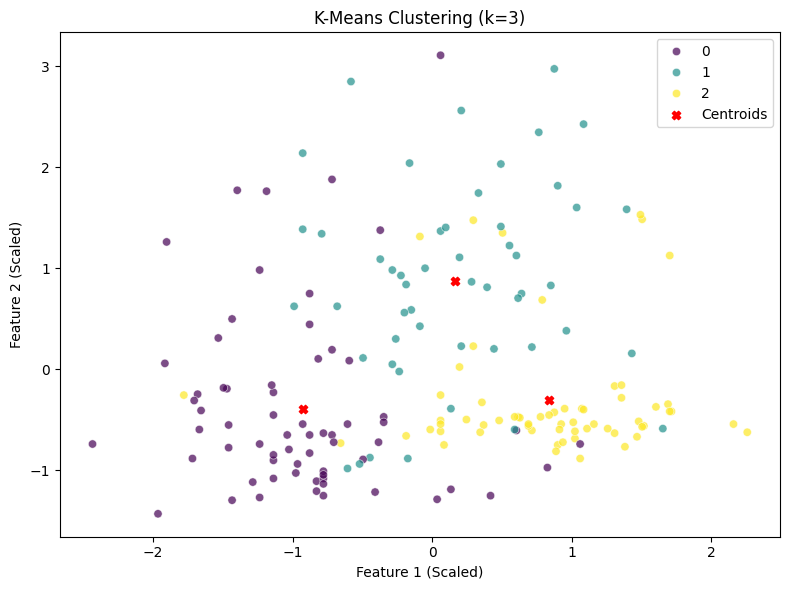

Silhouette Score for k=3: 0.28


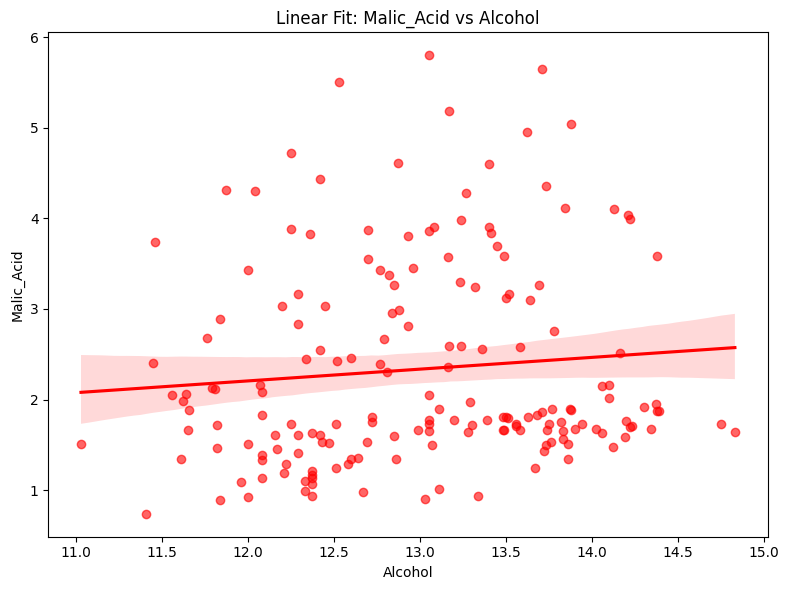

In [50]:
# Main Program
if __name__ == "__main__":
    filepath = "/content/wine-clustering.csv"
    dataset = load_dataset(filepath)

    # Select numerical columns for analysis
    numeric_data = dataset.select_dtypes(include=[np.number])

    # Create Plots
    create_relational_graph(dataset, "Alcohol", "Malic_Acid")
    create_categorical_graph(dataset, "Alcohol", "Proline")
    create_statistical_graph(numeric_data)
    create_elbow_plot(numeric_data)

    # Clustering and Fitting
    clusters = perform_clustering(numeric_data, n_clusters=3)
    model = perform_fitting(dataset, "Alcohol", "Malic_Acid")
